In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
class Dataset:
    def __init__(self, filename=None, X=None, Y=None):

        if filename is not None:
            self.readDataset(filename)
        elif X is not None and Y is not None:
            self.X = X
            self.Y = Y
    
    def readDataset(self, filename, sep = ","):
        data = np.genfromtxt(filename, delimiter=sep)
        self.X = data[:,0:-1]
        self.Y = data[:,-1]

    def getXy(self):
        return self.X, self.Y

In [24]:
def plotData_2vars(X, Y, xlabel, ylabel):
    plt.plot(X, Y, 'rx', markersize=7)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

In [25]:
def standardize(X):
    Xmed = np.mean(X, axis = 0)
    Xsigma = np.std(X, axis = 0)
    return (X-Xmed)/Xsigma
def normalize(X):
    Xmax = np.max(X, axis = 0)
    Xmin = np.min(X, axis = 0)
    return (X-Xmin)/(Xmax-Xmin)

In [26]:
def error_sqe(predictions,y):
    m = predictions.shape[0]
    #predictions = np.dot(self.X, self.theta)
    sqe = (predictions - y) ** 2
    res = np.sum(sqe) / (2*m)
    return res

In [27]:
class LinearRegression:
    def __init__(self, dataset, standardization = False, regularization = False, lamda = 1):
        self.X, self.y = dataset.getXy()
        self.standardization = standardization
        self.regularization = regularization
        self.lamda = lamda
        self.X = np.hstack((np.ones([self.X.shape[0],1]), self.X ))
        self.theta = np.zeros(self.X.shape[1])
        if self.standardization:
            self.X[:,1:] = standardize(self.X[:,1:])

    def buildModel(self):
        from numpy.linalg import inv
        if self.regularization:
            self.theta = self.analyticalWithReg()
        else:
            self.theta = inv(self.X.T.dot(self.X)).dot(self.X.T).dot(self.y)

    def analyticalWithReg(self):
        from numpy.linalg import inv
        matl = np.zeros([self.X.shape[1], self.X.shape[1]])
        for i in range(1,self.X.shape[1]):
            matl[i,i] = self.lamda
        theta = inv(self.X.T.dot(self.X) + matl).dot(self.X.T).dot(self.y)
        return theta    

    def predictions (self): #previsões dos casos de teste
        return np.dot(self.X, self.theta)

    def predict(self, instance):
        x = np.empty([self.X.shape[1]])
        x[0] = 1 #na 1ª posição coloca um 1
        x[1:] = np.array(instance[:self.X.shape[1]-1])
        print(instance)
        print(x)
        if self.standardization:
            #x[1:] = (x[1:] - self.mu) / self.sigma
            x[1:] = standardize(x[1:])
        return np.dot(self.theta, x)
    
    def costFunction(self):
        J = error_sqe(self.predictions(),self.y)
        return J

    def gradientDescent (self, iterations = 1000, alpha = 0.001):
        m = self.X.shape[0]
        n = self.X.shape[1]
        self.theta = np.zeros(n)
        if self.regularization:
            lamdas = np.zeros([self.X.shape[1]])
            for i in range(1,self.X.shape[1]):
                lamdas[i] = self.lamda
        for its in range(iterations):
            #predictions = np.dot(self.X, self.theta)
            J = error_sqe(self.predictions(),self.y)
            if its%100 == 0: print(J)
            delta = self.X.T.dot(self.X.dot(self.theta) - self.y)
            if self.regularization:
                self.theta -= (alpha/m * (lamdas+delta))
            else: self.theta -= (alpha/m * delta )

    def getXy (self):
        return self.X[:,1], self.y

    def getX (self):
        return self.X

    def get_theta (self):
        return self.theta

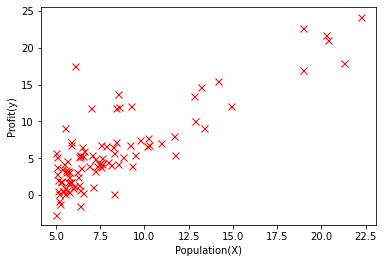

Cost function value for theta with zeros:
32.072733877455676


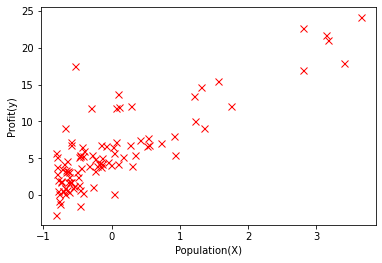

Cost function value for theta with zeros:
32.072733877455676


In [28]:
def test_2var_1(regul = False):
    ds= Dataset("lr-example1.data")
    if regul:
        lrmodel = LinearRegression(ds, True, True, 100.0)
    else:
        lrmodel = LinearRegression(ds)
    X,y = lrmodel.getXy()
    plotData_2vars(X,y,"Population(X)", "Profit(y)")
    print("Cost function value for theta with zeros:")
    print(lrmodel.costFunction())
    
test_2var_1(False)
test_2var_1(True)

In [ ]:
def test_2var_3(regul = False):
    ds= Dataset("lr-example1.data")
    if regul:
        lrmodel = LinearRegression(ds, True, True, 100.0)
    else:
        lrmodel = LinearRegression(ds)
    print(f"Model with analytical solution. Regularização = {regul}")
    lrmodel.buildModel()
    print(f"Cost function value for theta from analytical solution. Regularização = {regul}")
    print(lrmodel.costFunction())
    X,y = lrmodel.getXy()
    print(f"Casos. Regularização = {regul}")
    print(f"Shape: {X.shape}")
    print(X)
    print(f"Labels. Regularização = {regul}")
    print(f"Shape: {y.shape}")
    print(y)
    print(f"Coeficientes da solução analitica. Regularização = {regul}")
    theta = lrmodel.get_theta ()
    print(f"Shape: {theta.shape}")
    print(theta)
    print(f"Previsão para os casos de Treino usando o modelo. Regularização = {regul}")
    pred = lrmodel.predictions()
    print(pred.shape)
    print(pred)
    plotDataAndModel(X,y,pred, "Population", "Profit")

test_2var_3(False)
test_2var_3(True)